In [267]:
%matplotlib inline 

In [268]:
import numpy as np
import os
import obspy 
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib
from mpl_toolkits.axes_grid import Size
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid import make_axes_locatable
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.mlab import griddata
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from obspy.taup import TauPyModel


In [269]:
ev_listrPPS = []
ev_listrPP = []
gaussian_filter = '2.5'
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/syngine_filtered_PP/'):
#for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/rede_BB/event_data_PP_selected/'):
    for datafile in files:
        if datafile.endswith(gaussian_filter+'.eqr'):
            ev_listrPPS.append(os.path.join(root, datafile))
ev_listrPP = sorted(ev_listrPPS)

ev_listt = []
ev_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/syngine_filtered/'):
#for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/rede_BB/event_data_selected/'):
    for datafile in files:
        if datafile.endswith(gaussian_filter+'.eqr'):
            ev_listt.append(os.path.join(root, datafile))
ev_listr = sorted(ev_listt)

In [270]:
RF = []
RP_1 = []
GCARC_1 = []
time_PP_wave = []
for i,j in enumerate(ev_listr):
    b = obspy.read(j)
    RF.append(b[0].data)
    time = b[0].times()
    RP_1.append(b[0].stats.sac.user8)
    GCARC_1.append(b[0].stats.sac.gcarc)
    
    model = TauPyModel(model="iasp91")
    arrivalsP = model.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P"])
    arrP = arrivalsP[0]

    arrivalsPP = model.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PP"])
    arrPP = arrivalsPP[0]

    time_PP_wave.append(arrPP.time - arrP.time + 10)
    

RF_PP = []
RP_1_PP = []
GCARC_1_PP = []
time_PP_wave_PP = []
for i,j in enumerate(ev_listrPP):
    b_PP = obspy.read(j)
    RF_PP.append(b_PP[0].data)
    time_PP = b_PP[0].times()
    RP_1_PP.append(b_PP[0].stats.sac.user8)
    GCARC_1_PP.append(b_PP[0].stats.sac.gcarc)
    
    arrivalsP_PP = model.get_travel_times(source_depth_in_km=b_PP[0].stats.sac.evdp/1000, distance_in_degree=b_PP[0].stats.sac.gcarc, phase_list=["P"])
    arrP_PP = arrivalsP_PP[0]

    arrivalsPP_PP = model.get_travel_times(source_depth_in_km=b_PP[0].stats.sac.evdp/1000, distance_in_degree=b_PP[0].stats.sac.gcarc, phase_list=["PP"])
    arrPP_PP = arrivalsPP_PP[0]

    time_PP_wave_PP.append(arrPP_PP.time - arrP_PP.time + 10)
    

In [271]:
RF_orglisl = np.argsort(RP_1)[::-1] 
RF_orglisl_PP = np.argsort(RP_1_PP)[::-1]

In [272]:
FR = []
GCARC = []
RP = [] 
time_PP_wave_corrected = []
for i,j in enumerate(RF_orglisl):
    FR.append(RF[j])
    #GCARC.append(GCARC_1[j])
    RP.append(RP_1[j])
    time_PP_wave_corrected.append(time_PP_wave[j])

FR_PP = []
GCARC_PP = []
RP_PP = [] 
time_PP_wave_corrected_PP = [] 
for i,j in enumerate(RF_orglisl_PP):
    FR_PP.append(RF_PP[j])
    #GCARC_PP.append(GCARC_1_PP[j])
    RP_PP.append(RP_1_PP[j])
    time_PP_wave_corrected_PP.append(time_PP_wave_PP[j])


In [273]:
Z = np.array(FR)
Z_PP = np.array(FR_PP)

[Text(0,0,'8.0'), Text(0,0,'6.9'), Text(0,0,'5.6')]

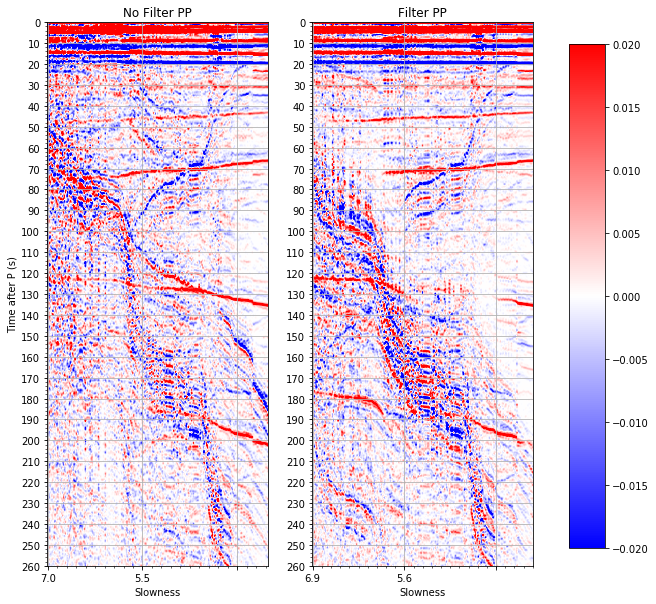

In [274]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(100)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)

colormap = cm.bwr

#Sismograma sem filtro PP
v=0.02
v_PP=0.02
im1 = ax.imshow(Z.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())
'''for i,j in enumerate(time_PP_wave_corrected):
    ax.plot(i,(j-30)*10,'.k',markersize=2)
    ax.plot(i,j*10,'^r',markersize=2)
    ax.plot(i,(j+30)*10,'.k',markersize=2)'''
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('No Filter PP')
#plt.colorbar(im1,ax=ax)


ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax.set_xticklabels(["{0:.1f}".format(RP[i]*100) for i in np.arange(0,len(RP),100)])
#Sismograma com filtro PP

im2 = ax1.imshow(Z_PP.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v_PP, vmin=-v_PP)

'''for i,j in enumerate(time_PP_wave_corrected):
    ax1.plot(i,(j-30)*10,'.k',markersize=2)
    ax1.plot(i,j*10,'^r',markersize=2)
    ax1.plot(i,(j+30)*10,'.k',markersize=2)'''
               
ax1.set_ylim(2700,100)
#ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Filter PP')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)
#plt.colorbar(im2)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im2, cax=cbar_ax)
ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax1.set_xticklabels(["{0:.1f}".format(RP_PP[i]*100) for i in np.arange(0,len(RP_PP),100)])


[Text(0,0,'8.0'), Text(0,0,'6.9'), Text(0,0,'5.6')]

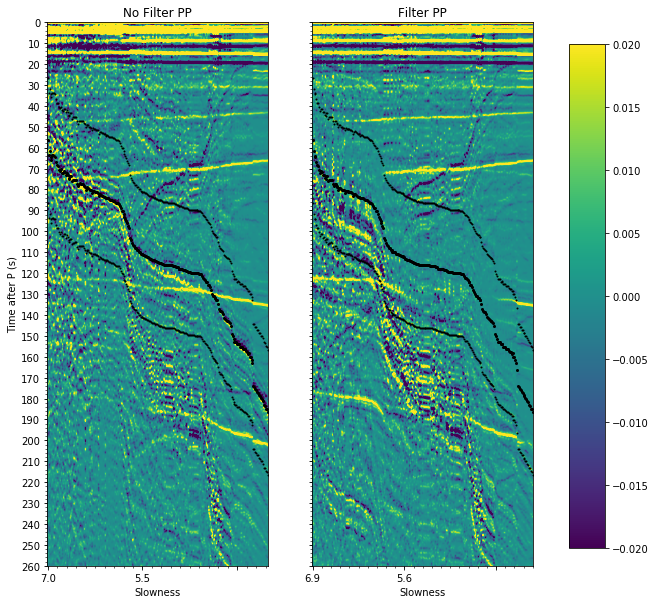

In [275]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

majorLocatorX = MultipleLocator(100)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)

colormap = cm.viridis

#Sismograma sem filtro PP
v=0.02
v_PP=0.02

im1 = ax.imshow(Z.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())
for i,j in enumerate(time_PP_wave_corrected):
    ax.plot(i,(j-30)*10,'.k',markersize=2)
    ax.plot(i,j*10,'ok',markersize=2)
    ax.plot(i,(j+30)*10,'.k',markersize=2)
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('No Filter PP')
#plt.colorbar(im1,ax=ax)

#ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax.set_xticklabels(["{0:.1f}".format(RP[i]*100) for i in np.arange(0,len(RP),100)])

#Sismograma com filtro PP

im2 = ax1.imshow(Z_PP.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v_PP, vmin=-v_PP)

for i,j in enumerate(time_PP_wave_corrected_PP):
    ax1.plot(i,(j-30)*10,'.k',markersize=2)
    ax1.plot(i,j*10,'ok',markersize=2)
    ax1.plot(i,(j+30)*10,'.k',markersize=2)
               
ax1.set_ylim(2700,100)
#ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Filter PP')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)
#plt.colorbar(im2)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im2, cax=cbar_ax)
#ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax1.set_xticklabels(["{0:.1f}".format(RP_PP[i]*100) for i in np.arange(0,len(RP_PP),100)])


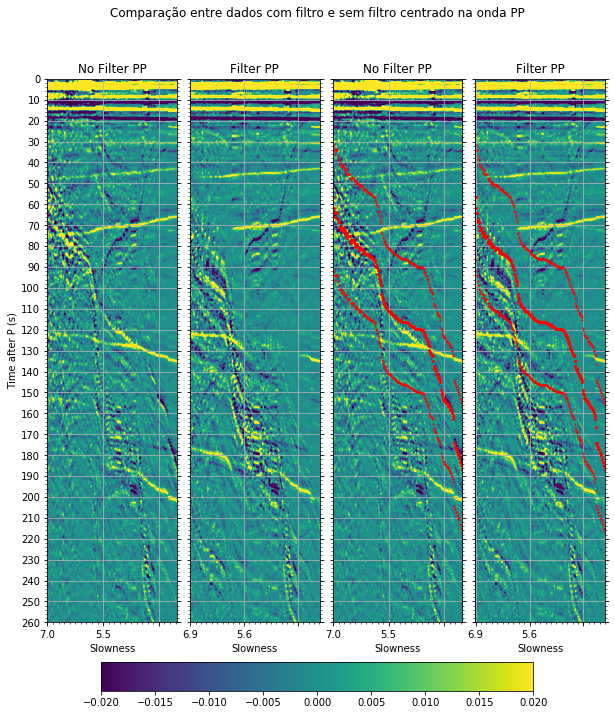

In [276]:
fig, (ax,ax1,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 10), sharey=True)

majorLocatorX = MultipleLocator(100)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)

colormap = cm.viridis

#Sismograma sem filtro PP
v=0.02
v_PP=0.02

im1 = ax.imshow(Z.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())
'''for i,j in enumerate(time_PP_wave_corrected):
    ax.plot(i,(j-30)*10,'.k',markersize=2)
    ax.plot(i,j*10,'^r',markersize=2)
    ax.plot(i,(j+30)*10,'.k',markersize=2)'''
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.yaxis.set_ticks_position('both')

ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('No Filter PP')
#plt.colorbar(im1,ax=ax)


ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax.set_xticklabels(["{0:.1f}".format(RP[i]*100) for i in np.arange(0,len(RP),100)])
#Sismograma com filtro PP

im2 = ax1.imshow(Z_PP.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v_PP, vmin=-v_PP)

'''for i,j in enumerate(time_PP_wave_corrected_PP):
    ax1.plot(i,(j-30)*10,'.k',markersize=2)
    ax1.plot(i,j*10,'^r',markersize=2)
    ax1.plot(i,(j+30)*10,'.k',markersize=2)'''
               
ax1.set_ylim(2700,100)
#ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Filter PP')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)
ax1.yaxis.set_ticks_position('both')

#plt.colorbar(im2)
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im2, cax=cbar_ax)
ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax1.set_xticklabels(["{0:.1f}".format(RP_PP[i]*100) for i in np.arange(0,len(RP_PP),100)])

majorLocatorX = MultipleLocator(100)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)

#Sismograma sem filtro PP
im3 = ax3.imshow(Z.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())
for i,j in enumerate(time_PP_wave_corrected):
    ax3.plot(i,(j-30)*10,'.r',markersize=2)
    ax3.plot(i,j*10,'or',markersize=2)
    ax3.plot(i,(j+30)*10,'.r',markersize=2)
    
ax3.set_ylim(2700,100)
ax3.xaxis.set_major_locator(majorLocatorX)
ax3.yaxis.set_major_locator(majorLocatorY)
ax3.xaxis.set_minor_locator(minorLocatorX)
ax3.yaxis.set_minor_locator(minorLocatorY)
ax3.yaxis.set_ticks_position('both')

#ax3.set_ylabel('Time after P (s)')
ax3.set_xlabel('Slowness')
ax3.set_title('No Filter PP')
#plt.colorbar(im3,ax=ax3)

ax3.grid(True)
ax3.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax3.set_xticklabels(["{0:.1f}".format(RP[i]*100) for i in np.arange(0,len(RP),100)])

#Sismograma com filtro PP

im4 = ax4.imshow(Z_PP.T, interpolation='bicubic', cmap=colormap,
                origin='upper', aspect='auto',
                vmax=v_PP, vmin=-v_PP)

for i,j in enumerate(time_PP_wave_corrected_PP):
    ax4.plot(i,(j-30)*10,'.r',markersize=2)
    ax4.plot(i,j*10,'or',markersize=2)
    ax4.plot(i,(j+30)*10,'.r',markersize=2)
               
ax4.set_ylim(2700,100)
#ax1.set_ylabel('Time after P (s)')
ax4.set_xlabel('Slowness')
ax4.set_title('Filter PP')

ax4.xaxis.set_major_locator(majorLocatorX)
ax4.yaxis.set_major_locator(majorLocatorY)
ax4.xaxis.set_minor_locator(minorLocatorX)
ax4.yaxis.set_minor_locator(minorLocatorY)
ax4.yaxis.set_ticks_position('both')


ax4.grid(True)
ax4.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax4.set_xticklabels(["{0:.1f}".format(RP_PP[i]*100) for i in np.arange(0,len(RP_PP),100)])
fig.suptitle('Comparação entre dados com filtro e sem filtro centrado na onda PP')
plt.subplots_adjust(wspace=0.1, hspace=None)

#plt.colorbar(im4)
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im4, cax=cbar_ax)
cax = fig.add_axes([0.2, 0.03, 0.6, 0.04])
fig.colorbar(im4, cax=cax,orientation='horizontal',)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/comparacao_syn_data'+gaussian_filter+'.pdf',dpi=300)
#fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/comparacao_real_data'+gaussian_filter+'.pdf',dpi=300)